In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns

In [22]:
df = pd.read_csv('segmentada.csv')

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(df.head())

         d8        d5        d7        d0        x8        x5        x7  \
0  0.002534  0.054895  0.041522  0.057841 -0.069561 -0.012329 -0.113641   
1  0.002241  0.082535  0.035515  0.079078 -0.070179  0.005430 -0.088333   
2  0.071195  0.300494  0.111925  0.136287 -0.005589  0.237707 -0.017873   
3  0.151984  0.158136  0.166274  0.125265 -0.033199 -0.153598  0.018912   
4  0.196612  0.089259  0.147832  0.119468 -0.029745  0.032694  0.093026   

         x0        m8        m5  ...        d2        x9      x0.1      x8.1  \
0 -0.021926 -0.069225 -0.042910  ...  0.006265 -0.069161 -0.000391 -0.069902   
1 -0.055264 -0.070389 -0.055693  ...  0.009458 -0.074414  0.006989 -0.087719   
2  0.090340 -0.009867  0.238795  ...  0.210151 -0.002957  0.030859  0.001466   
3 -0.136506 -0.030836 -0.063219  ...  0.078567 -0.054199 -0.039953 -0.008080   
4 -0.027950 -0.083515  0.004362  ...  0.195842 -0.005517  0.007372 -0.048129   

         x2        m9      m0.1      m8.1        m2  target  
0 -0.0

In [23]:
X_train,X_test,y_train ,y_test=train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=42, stratify=df['target'])

In [24]:
conteo_clases = y_train.value_counts().to_dict()
print(conteo_clases)
conteo_clases = y_test.value_counts().to_dict()
print(conteo_clases)

{0.0: 42, 1.0: 36}
{0.0: 11, 1.0: 9}


Training Accuracy: 1.0
Best Parameters: {'forest__bootstrap': False, 'forest__max_depth': None, 'forest__min_samples_leaf': 4, 'forest__min_samples_split': 10, 'forest__n_estimators': 50}
Accuracy Score: 0.85

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        11
         1.0       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



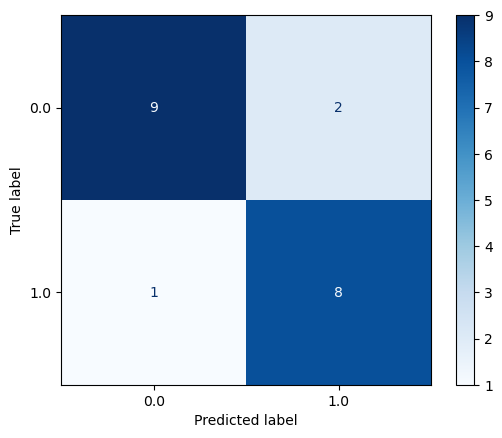

In [25]:
pipeline = Pipeline(steps=[
    ('forest', RandomForestClassifier())  
])

param_grid = {
    'forest__n_estimators': [50, 100, 200], 
    'forest__max_depth': [None, 10, 20, 30], 
    'forest__min_samples_split': [2, 5, 10],  
    'forest__min_samples_leaf': [1, 2, 4],  
    'forest__bootstrap': [True, False] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
y_train_pred = best_pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=grid_search.best_estimator_.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
import joblib
joblib.dump(best_pipeline, 'rf_pipeline_2.pkl')


['rf_pipeline_2.pkl']